In [61]:
###get the survival data
CRC.survivaldata=read.table("/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/clinical.data/COADREAD_survival.from.pan-cancer.Atlas.txt",header = T,row.names = 1,sep = "\t")

In [62]:
###get the TE expression
load("~/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/output.plot/tmp.RData")
load('~/nas/Xiaoqiang/opti.data//1.CGC.TE.CRC.REdiscoverTE/stats.20200311/1.TE.used/TE.label.used.RData')

In [63]:
###inclue TE used
head(cdrep)
table(cdrep$repClass.new2)
cdrep.sel=subset(cdrep, !(repClass.new2=="other.repeats"))
dim(cdrep.sel)
###TE matrix selection
te.tumorexp.sel=te.tumorexp[, colnames(te.tumorexp) %in% rownames(cdrep.sel)]
te.tumorexp.sel=te.tumorexp.sel[-which(rownames(te.tumorexp.sel)=="TCGA-CM-4748-01"),]
te.tumorexp.sel[1:4,1:4]
dim(te.tumorexp.sel)


,repName,repFamily,repClass,repClass.new,repClass.new2
,<chr>,<chr>,<chr>,<chr>,<chr>
7SK,7SK,RNA,RNA,RNA,other.repeats
7SLRNA,7SLRNA,srpRNA,srpRNA,srpRNA,other.repeats
A-rich,A-rich,Low_complexity,Low_complexity,Low_complexity,other.repeats
ACRO1,ACRO1,acro,Satellite,Satellite,Satellite
ALR/Alpha,ALR/Alpha,centr,Satellite,Satellite,Satellite
Alu,Alu,Alu,SINE,SINE,SINE



          DNA          LINE           LTR other.repeats    Retroposon 
          237           171           578           132             6 
    Satellite          SINE 
           20            60 

[1] 1072    5

,ACRO1,ALR/Alpha,Alu,AluJb
,<dbl>,<dbl>,<dbl>,<dbl>
TCGA-3L-AA1B-01,-1.23700135,3.297682,-0.7258298,7.493645
TCGA-4N-A93T-01,-0.81356339,1.955835,-0.6162215,7.978005
TCGA-4T-AA8H-01,2.33785614,2.562055,-0.9357847,7.784363
TCGA-5M-AAT4-01,-0.04531771,3.181040,-1.0839568,7.568818


[1]  617 1072

In [64]:
#screen for OS
#OS
surOS.tumor=subset(CRC.survivaldata,OS.time > 0 & OS>= 0)
idsur=intersect(rownames(te.tumorexp.sel),rownames(surOS.tumor))
length(idsur)
cbOSdata=cbind(surOS.tumor[idsur,2:3],te.tumorexp.sel[idsur,])

[1] 591

In [65]:
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$OS,  #CHANGE
                             os=cbOSdata$OS.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.os=cox_results[,cox_results[4,]<0.05]
dim(Results.os)

[1]  10 131

In [66]:
#DSS
surDSS.tumor=subset(CRC.survivaldata,DSS.time > 0 & DSS >=0)
idsur=intersect(rownames(te.tumorexp.sel),rownames(surDSS.tumor))
length(idsur)
cbOSdata=cbind(surDSS.tumor[idsur,4:5],te.tumorexp.sel[idsur,])     ####570 SAMPLES

[1] 569

In [67]:
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$DSS,  #CHANGE
                             os=cbOSdata$DSS.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.dss=cox_results[,cox_results[4,]<0.05]
dim(Results.dss)

[1]  10 157

In [68]:
#DFI
surDFI.tumor=subset(CRC.survivaldata,DFI.time > 0 & DFI >=0)
idsur=intersect(rownames(te.tumorexp.sel),rownames(surDFI.tumor))
length(idsur)
cbOSdata=cbind(surDFI.tumor[idsur,6:7],te.tumorexp.sel[idsur,])     #####234 SAMPLES

[1] 233

In [69]:
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$DFI,  #CHANGE
                             os=cbOSdata$DFI.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.dfi=cox_results[,cox_results[4,]<0.05]
dim(Results.dfi)

[1]  10 140

In [70]:
#PFI PFI.time
surPFI.tumor=subset(CRC.survivaldata,PFI.time > 0 & PFI >= 0)
idsur=intersect(rownames(te.tumorexp.sel),rownames(surPFI.tumor))
length(idsur)
cbOSdata=cbind(surPFI.tumor[idsur,8:9],te.tumorexp.sel[idsur,])     #####590 SAMPPLES
##

[1] 589

In [71]:
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$PFI,  #CHANGE
                             os=cbOSdata$PFI.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.pfi=cox_results[,cox_results[4,]<0.05]
dim(Results.pfi)

[1]  10 161

In [72]:
save(Results.os,Results.dfi,Results.pfi,Results.dss,
     file="/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen/survival.screen.subfamily.level.1072s.2.RData")

In [73]:
###screen at family level
#######
###############
tefamily.tumorexp.sel=tefamily.tumorexp.filterd[, colnames(tefamily.tumorexp.filterd) %in% cdrep.sel$repFamily ]
tefamily.tumorexp.sel=tefamily.tumorexp.sel[-which(rownames(tefamily.tumorexp.sel)=="TCGA-CM-4748-01"),]
dim(tefamily.tumorexp.sel)

[1] 617  47

In [74]:
#screen for OS
#OS
surOS.tumor=subset(CRC.survivaldata,OS.time > 0 & OS>= 0)
idsur=intersect(rownames(tefamily.tumorexp.sel),rownames(surOS.tumor))
length(idsur)
cbOSdata=cbind(surOS.tumor[idsur,2:3],tefamily.tumorexp.sel[idsur,])

[1] 591

In [75]:
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$OS,  #CHANGE
                             os=cbOSdata$OS.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.os.family=cox_results[,cox_results[4,]<0.05]
dim(Results.os.family)

[1] 10  7

In [76]:
#DSS
surDSS.tumor=subset(CRC.survivaldata,DSS.time > 0 & DSS >=0)
idsur=intersect(rownames(tefamily.tumorexp.sel),rownames(surDSS.tumor))
length(idsur)
cbOSdata=cbind(surDSS.tumor[idsur,4:5],tefamily.tumorexp.sel[idsur,])     ####570 SAMPLES

[1] 569

In [77]:
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$DSS,  #CHANGE
                             os=cbOSdata$DSS.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.dss.family=cox_results[,cox_results[4,]<0.05]
dim(Results.dss.family)

[1] 10  8

In [78]:
#DFI
surDFI.tumor=subset(CRC.survivaldata,DFI.time > 0 & DFI >=0)
idsur=intersect(rownames(tefamily.tumorexp.sel),rownames(surDFI.tumor))
length(idsur)
cbOSdata=cbind(surDFI.tumor[idsur,6:7],tefamily.tumorexp.sel[idsur,])     #####234 SAMPLES

[1] 233

In [79]:
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$DFI,  #CHANGE
                             os=cbOSdata$DFI.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.dfi.family=cox_results[,cox_results[4,]<0.05]
dim(Results.dfi.family)

[1] 10  6

In [80]:
#PFI PFI.time
surPFI.tumor=subset(CRC.survivaldata,PFI.time > 0 & PFI >= 0)
idsur=intersect(rownames(tefamily.tumorexp.sel),rownames(surPFI.tumor))
length(idsur)
cbOSdata=cbind(surPFI.tumor[idsur,8:9],tefamily.tumorexp.sel[idsur,])     #####590 SAMPPLES
##

[1] 589

In [81]:
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$PFI,  #CHANGE
                             os=cbOSdata$PFI.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.pfi.family=cox_results[,cox_results[4,]<0.05]
dim(Results.pfi.family)

[1] 10 10

In [82]:
save(Results.os.family,Results.dfi.family,Results.pfi.family,Results.dss.family,
     file="/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen/survival.screen.family.level.47s.2.RData")

In [86]:
###screen at class level
#######
###############
teclass.tumorexp.sel=teclass.tumorexp.filterd[, colnames(teclass.tumorexp.filterd) %in% cdrep.sel$repClass ]
teclass.tumorexp.sel=teclass.tumorexp.sel[-which(rownames(teclass.tumorexp.sel)=="TCGA-CM-4748-01"),]
dim(teclass.tumorexp.sel)

[1] 617   6

In [87]:
#screen for OS
#OS
surOS.tumor=subset(CRC.survivaldata,OS.time > 0 & OS>= 0)
idsur=intersect(rownames(teclass.tumorexp.sel),rownames(surOS.tumor))
length(idsur)
cbOSdata=cbind(surOS.tumor[idsur,2:3],teclass.tumorexp.sel[idsur,])
#
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$OS,  #CHANGE
                             os=cbOSdata$OS.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.os.class=cox_results
dim(Results.os.class)


[1] 591

[1] 10  6

In [88]:
#DSS
surDSS.tumor=subset(CRC.survivaldata,DSS.time > 0 & DSS >=0)
idsur=intersect(rownames(teclass.tumorexp.sel),rownames(surDSS.tumor))
length(idsur)
cbOSdata=cbind(surDSS.tumor[idsur,4:5],teclass.tumorexp.sel[idsur,])     ####570 SAMPLES
#
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$DSS,  #CHANGE
                             os=cbOSdata$DSS.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.dss.class=cox_results
dim(Results.dss.class)

[1] 569

[1] 10  6

In [85]:
#DFI
surDFI.tumor=subset(CRC.survivaldata,DFI.time > 0 & DFI >=0)
idsur=intersect(rownames(teclass.tumorexp.sel),rownames(surDFI.tumor))
length(idsur)
cbOSdata=cbind(surDFI.tumor[idsur,6:7],teclass.tumorexp.sel[idsur,])     #####234 SAMPLES
#
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$DFI,  #CHANGE
                             os=cbOSdata$DFI.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.dfi.class=cox_results
dim(Results.dfi.class)

[1] 233

[1] 10  6

In [89]:
#PFI PFI.time
surPFI.tumor=subset(CRC.survivaldata,PFI.time > 0 & PFI >= 0)
idsur=intersect(rownames(teclass.tumorexp.sel),rownames(surPFI.tumor))
length(idsur)
cbOSdata=cbind(surPFI.tumor[idsur,8:9],teclass.tumorexp.sel[idsur,])     #####590 SAMPPLES
##
##########  useful
cox_results <- apply(cbOSdata[,-c(1,2)] , 2, function(values1){
  group=ifelse(values1>median(values1),'Migh','low')
  #group=values1
  survival_dat <- data.frame(group=group,
                             os.status=cbOSdata$PFI,  #CHANGE
                             os=cbOSdata$PFI.time,   #CHANGE
                             #age=clin$age,
                             #gender=gender,
                             #stage=stage,
                             #smoking=smoking,
                             stringsAsFactors = F)
  library(survival)
  my.surv <- Surv(survival_dat$os,survival_dat$os.status)
  #m=coxph(my.surv ~ group+age+gender+stage+smoking, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp['groupMigh',])
  
})
Results.pfi.class=cox_results
dim(Results.pfi.class)

[1] 589

[1] 10  6

In [90]:
save(Results.os.class,Results.dfi.class,Results.pfi.class,Results.dss.class,
     file="/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen/survival.screen.class.level.6s.2.RData")

In [91]:
######subfamily level
#########plot the data
###############
#
sursc=as.data.frame(t(Results.dss))
surstat=cbind(sursc, repinfo.sel[rownames(sursc),])
surstat$endpoint=rep("dss", times=nrow(surstat))
surstat.dss=surstat
#
sursc=as.data.frame(t(Results.os))
surstat=cbind(sursc, repinfo.sel[rownames(sursc),])
surstat$endpoint=rep("os", times=nrow(surstat))
surstat.os=surstat
#
sursc=as.data.frame(t(Results.dfi))
surstat=cbind(sursc, repinfo.sel[rownames(sursc),])
surstat$endpoint=rep("dfi", times=nrow(surstat))
surstat.dfi=surstat
#
sursc=as.data.frame(t(Results.pfi))
surstat=cbind(sursc, repinfo.sel[rownames(sursc),])
surstat$endpoint=rep("pfi", times=nrow(surstat))
surstat.pfi=surstat
###
cb.data=rbind(surstat.dfi, surstat.dss, surstat.os, surstat.pfi)
table(cb.data$repClass,cb.data$endpoint)
table(surstat.dfi$repClass)

            
             dfi dss  os pfi
  DNA         31  20  20  28
  LINE        40  10  15  13
  LTR         61 105  79 109
  Retroposon   0   4   6   3
  Satellite    3   4   1   5
  SINE         5  14  10   3


      DNA      LINE       LTR Satellite      SINE 
       31        40        61         3         5 

png 
  2

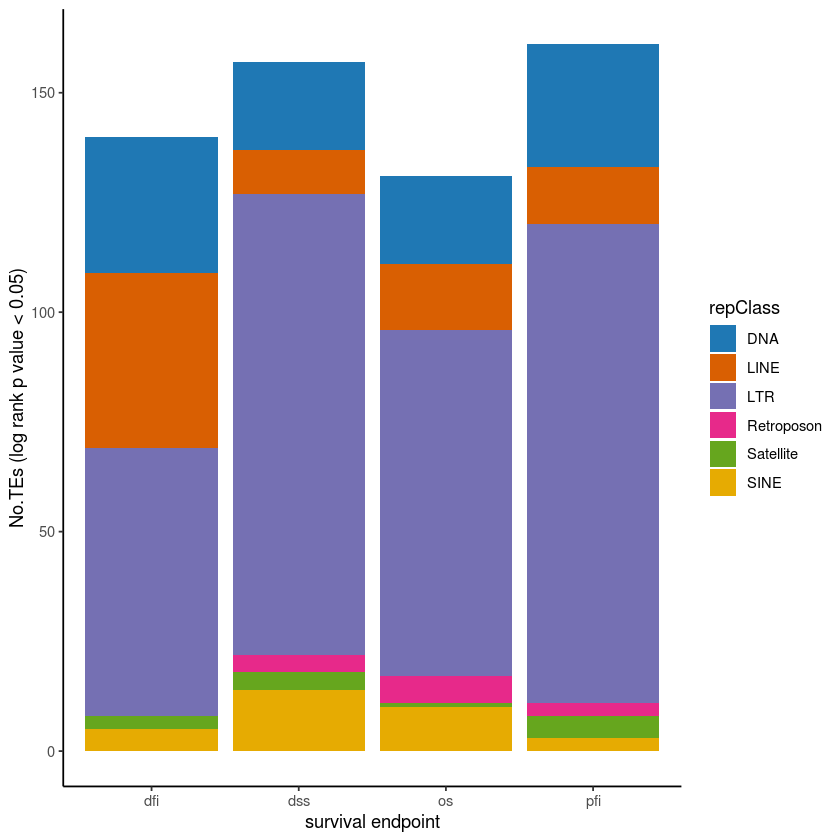

In [92]:
# stacked bar chart; Barplot of the count
library(easyGgplot2)
#cbPalette= c("#984ea3","#377eb8","#e41a1c","#4daf4a","#ff7f00","grey")
cbPalette= c("#1f78b4","#d95f02","#7570b3","#e7298a","#66a61e","#e6ab02")
pc=ggplot2.barplot(data=cb.data, xName="endpoint",
                   #brewerPalette="Blues",
                   groupName="repClass")+
  scale_fill_manual(values= cbPalette)+theme_classic()+
  ylab("No.TEs (log rank p value < 0.05)")+xlab("survival endpoint")
generate.PDF <- function(fig) {
  pdf("/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen/stacked.plot.endpoint.2.pdf",width = 4,height = 5)
  print(pc)
  dev.off()
}
generate.PDF(fig)
ggplot2.barplot(data=cb.data, xName="endpoint",
                   #brewerPalette="Blues",
                   groupName="repClass")+
  scale_fill_manual(values= cbPalette)+theme_classic()+
  ylab("No.TEs (log rank p value < 0.05)")+xlab("survival endpoint")

png 
  2

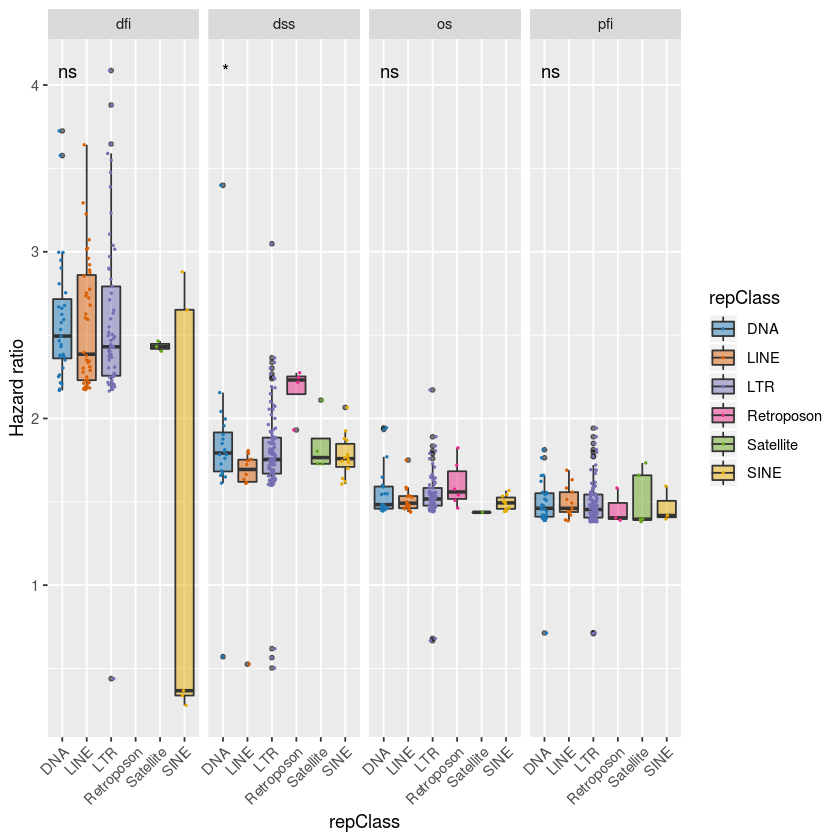

In [93]:
library(ggpubr)
ggplot(cb.data, aes_string(x="repClass", y="HR", group="repClass")) + 
    geom_boxplot(aes(fill = repClass), alpha = 0.5,outlier.colour = "black",outlier.size = 1,notch = F)+
    stat_compare_means(label = "p.signif",method = "kruskal.test")+
    geom_jitter(aes(color = repClass),width = 0.15,size=0.3)+
    facet_grid(. ~ endpoint)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    scale_fill_manual(values=cbPalette)+ # Boxplot fill color
    scale_color_manual(values = cbPalette)+ylab("Hazard ratio")

ph=ggplot(cb.data, aes_string(x="repClass", y="HR", group="repClass")) + 
    geom_boxplot(aes(fill = repClass), alpha = 0.5,outlier.colour = "black",outlier.size = 1,notch = F)+
    stat_compare_means(label = "p.signif",method = "kruskal.test")+
    geom_jitter(aes(color = repClass),width = 0.15,size=0.3)+
    facet_grid(. ~ endpoint)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    scale_fill_manual(values=cbPalette)+ # Boxplot fill color
    scale_color_manual(values = cbPalette)+ylab("Hazard ratio")+ggtitle("survival at subfamily level")
generate.PDF <- function(fig) {
  pdf("/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen/HR.endpoint.subfamily.2.pdf",width = 6,height = 5)
  print(ph)
  dev.off()
}
generate.PDF(fig)

In [94]:
######family level
#########plot the data
###############
#
repf=cdrep.sel[!(duplicated(cdrep.sel$repFamily)),]
rownames(repf)=repf$repFamily
####
sursc=as.data.frame(t(Results.dss.family))
surstat=cbind(sursc, repf[rownames(sursc),])
surstat$endpoint=rep("dss", times=nrow(surstat))
surstat.dss.family=surstat
#
sursc=as.data.frame(t(Results.os.family))
surstat=cbind(sursc, repf[rownames(sursc),])
surstat$endpoint=rep("os", times=nrow(surstat))
surstat.os.family=surstat
#
sursc=as.data.frame(t(Results.dfi.family))
surstat=cbind(sursc, repf[rownames(sursc),])
surstat$endpoint=rep("dfi", times=nrow(surstat))
surstat.dfi.family=surstat
#
sursc=as.data.frame(t(Results.pfi.family))
surstat=cbind(sursc, repf[rownames(sursc),])
surstat$endpoint=rep("pfi", times=nrow(surstat))
surstat.pfi.family=surstat
###
cb.data.family=rbind(surstat.dfi.family, surstat.dss.family, surstat.os.family, surstat.pfi.family)
#cb.data.family$repClass=gsub(pattern = "[?]","_",cb.data.family$repClass)
#cb.data.family=subset(cb.data.family, !(repClass=="SINE_"))
head(cb.data.family)

,coef,se,z,p,HR,HRse,HRz,HRp,HRCILL,HRCIUL,repName,repFamily,repClass,repClass.new,repClass.new2,endpoint
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERVL?,0.880,0.397,2.217,0.027,2.410,0.956,1.475,0.140,1.107,5.245,LTR55,ERVL?,LTR,LTR,LTR,dfi
Gypsy?,1.002,0.416,2.408,0.016,2.724,1.133,1.521,0.128,1.205,6.157,LTR85a,Gypsy?,LTR,LTR,LTR,dfi
hAT?,0.992,0.416,2.382,0.017,2.697,1.123,1.511,0.131,1.192,6.101,MER121,hAT?,DNA,DNA,DNA,dfi
MIR,0.807,0.392,2.060,0.039,2.241,0.878,1.413,0.158,1.040,4.828,MIR,MIR,SINE,SINE,SINE,dfi
TcMar?,0.869,0.417,2.083,0.037,2.385,0.995,1.391,0.164,1.053,5.404,Eulor8,TcMar?,DNA,DNA,DNA,dfi
tRNA,1.058,0.404,2.621,0.009,2.880,1.163,1.617,0.106,1.306,6.354,LFSINE_Vert,tRNA,SINE,SINE,SINE,dfi


png 
  2

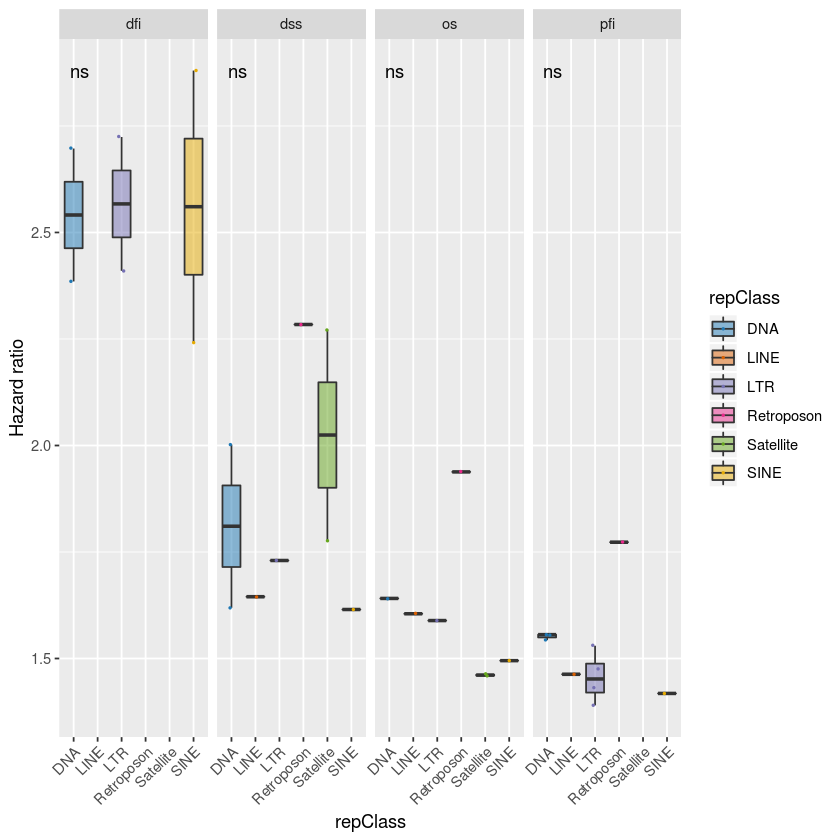

In [95]:
library(ggpubr)
cbPalette= c("#1f78b4","#d95f02","#7570b3","#e7298a","#66a61e","#e6ab02","gray")


ggplot(cb.data.family, aes_string(x="repClass", y="HR", group="repClass")) + 
    geom_boxplot(aes(fill = repClass), alpha = 0.5,outlier.colour = "black",outlier.size = 1,notch = F)+
    stat_compare_means(label = "p.signif",method = "kruskal.test")+
    geom_jitter(aes(color = repClass),width = 0.15,size=0.3)+
    facet_grid(. ~ endpoint)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    scale_fill_manual(values=cbPalette)+ # Boxplot fill color
    scale_color_manual(values = cbPalette)+ylab("Hazard ratio")

ph=ggplot(cb.data.family, aes_string(x="repClass", y="HR", group="repClass")) + 
    geom_boxplot(aes(fill = repClass), alpha = 0.5,outlier.colour = "black",outlier.size = 1,notch = F)+
    stat_compare_means(label = "p.signif",method = "kruskal.test")+
    geom_jitter(aes(color = repClass),width = 0.15,size=0.3)+
    facet_grid(. ~ endpoint)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    scale_fill_manual(values=cbPalette)+ # Boxplot fill color
    scale_color_manual(values = cbPalette)+ylab("Hazard ratio")
generate.PDF <- function(fig) {
  pdf("/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen/HR.endpoint.family.2.pdf",width = 6,height = 5)
  print(ph)
  dev.off()
}
generate.PDF(fig)


png 
  2

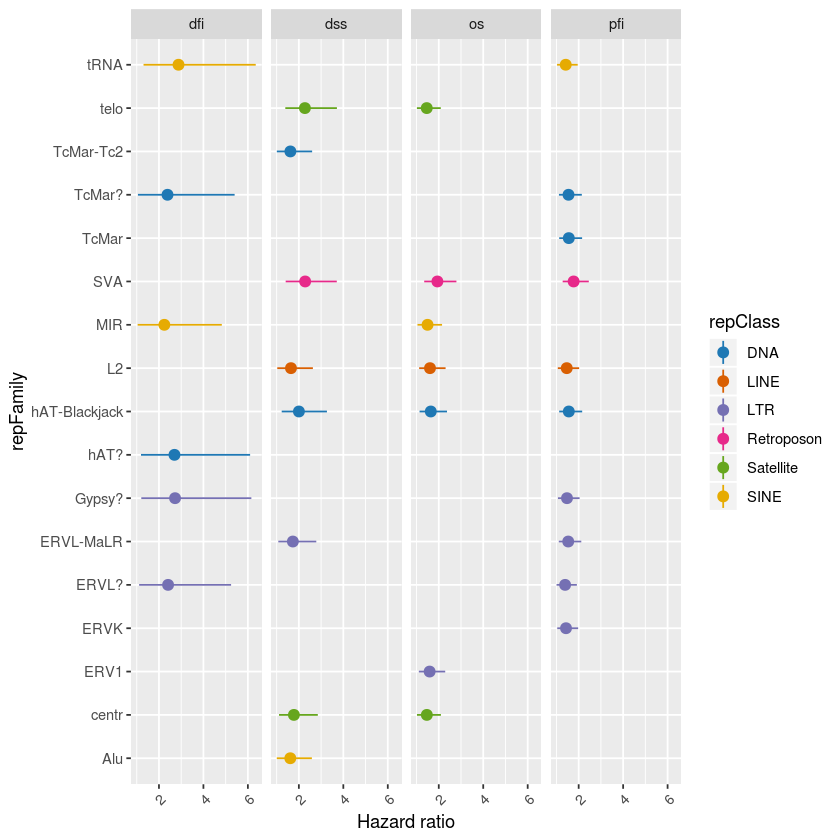

In [96]:
 ggplot(cb.data.family, aes( repFamily,HR, colour = repClass)) + 
       geom_pointrange(aes(ymin = HRCILL, ymax = HRCIUL))+
       facet_grid(. ~ endpoint)+
       scale_fill_manual(values=cbPalette)+ # Boxplot fill color
       scale_color_manual(values = cbPalette)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+rotate()+ylab("Hazard ratio")
#
 phf=ggplot(cb.data.family, aes( repFamily,HR, colour = repClass)) + 
       geom_pointrange(aes(ymin = HRCILL, ymax = HRCIUL),fatten = 2)+
       facet_grid(. ~ endpoint)+
       scale_fill_manual(values=cbPalette)+ # Boxplot fill color
       scale_color_manual(values = cbPalette)+
       #theme(axis.text.x = element_text(angle = 45, hjust = 1))+
       rotate()+ylab("Hazard ratio")+ggtitle("survival at repFamily level (n = 47)")
generate.PDF <- function(fig) {
  pdf("/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen/HR.endpoint.family.indi.2.pdf",
      width = 8,height = 4)
  print(phf)
  dev.off()
}
generate.PDF(fig)

In [97]:
#####class level
####
surstat=as.data.frame(t(Results.dss.class))
surstat$endpoint=rep("dss", times=nrow(surstat))
surstat$repClass=rownames(surstat)
surstat.dss.class=surstat
#
surstat=as.data.frame(t(Results.os.class))
surstat$endpoint=rep("os", times=nrow(surstat))
surstat$repClass=rownames(surstat)
surstat.os.class=surstat
#
surstat=as.data.frame(t(Results.dfi.class))
surstat$endpoint=rep("dfi", times=nrow(surstat))
surstat$repClass=rownames(surstat)
surstat.dfi.class=surstat
#
surstat=as.data.frame(t(Results.pfi.class))
surstat$endpoint=rep("pfi", times=nrow(surstat))
surstat$repClass=rownames(surstat)
surstat.pfi.class=surstat
###
cb.data.class=rbind(surstat.dfi.class, surstat.dss.class, surstat.os.class, surstat.pfi.class)
head(cb.data.class)
table(cb.data.class$repClass)

,coef,se,z,p,HR,HRse,HRz,HRp,HRCILL,HRCIUL,endpoint,repClass
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
DNA,0.344,0.375,0.918,0.358,1.411,0.529,0.777,0.437,0.677,2.944,dfi,DNA
LINE,0.618,0.385,1.606,0.108,1.855,0.713,1.198,0.231,0.873,3.941,dfi,LINE
LTR,0.317,0.374,0.847,0.397,1.373,0.514,0.726,0.468,0.659,2.860,dfi,LTR
Retroposon,0.088,0.373,0.236,0.813,1.092,0.408,0.226,0.821,0.525,2.270,dfi,Retroposon
Satellite,0.302,0.375,0.806,0.420,1.353,0.507,0.696,0.486,0.649,2.822,dfi,Satellite
SINE,-0.233,0.380,-0.612,0.540,0.792,0.301,-0.690,0.490,0.376,1.668,dfi,SINE



       DNA       LINE        LTR Retroposon  Satellite       SINE 
         4          4          4          4          4          4 

png 
  2

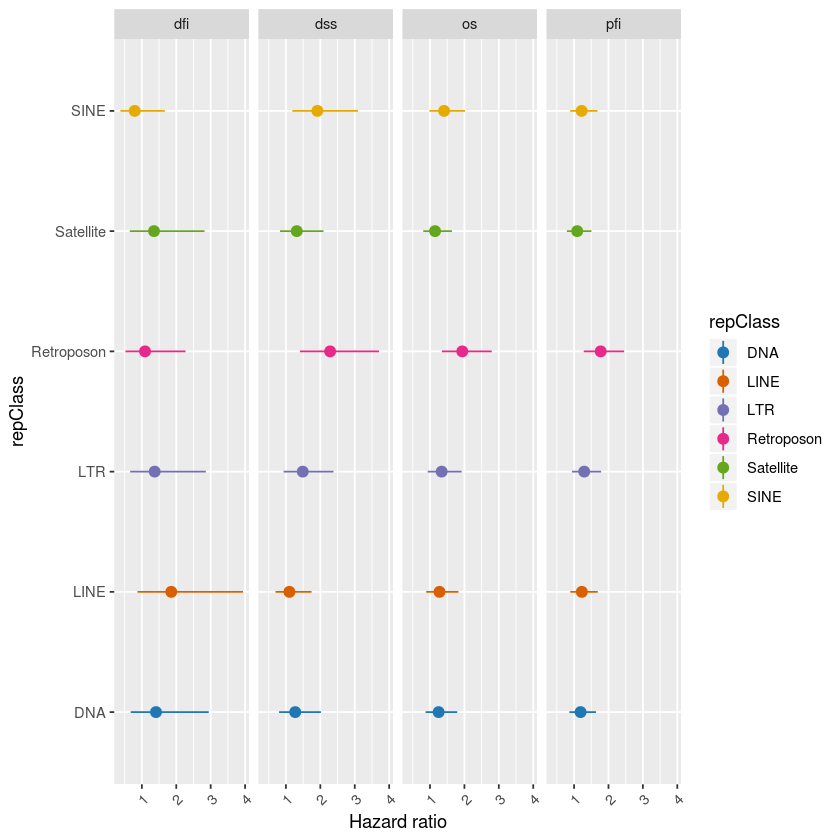

In [98]:
 ggplot(cb.data.class, aes( repClass,HR, colour = repClass)) + 
       geom_pointrange(aes(ymin = HRCILL, ymax = HRCIUL))+
       facet_grid(. ~ endpoint)+
       scale_fill_manual(values=cbPalette)+ # Boxplot fill color
       scale_color_manual(values = cbPalette)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+rotate()+ylab("Hazard ratio")
#
 phf=ggplot(cb.data.class, aes( repClass,HR, colour = repClass)) + 
       geom_pointrange(aes(ymin = HRCILL, ymax = HRCIUL),fatten = 2)+
       facet_grid(. ~ endpoint)+
       scale_fill_manual(values=cbPalette)+ # Boxplot fill color
       scale_color_manual(values = cbPalette)+
       #theme(axis.text.x = element_text(angle = 45, hjust = 1))+
       rotate()+ylab("Hazard ratio")+ggtitle("survival at class level (n = 6)")
generate.PDF <- function(fig) {
  pdf("/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen/HR.endpoint.class.2.pdf",
      width = 8,height = 4)
  print(phf)
  dev.off()
}
generate.PDF(fig)

In [99]:
####check the overlapped te among these four endpoints
####
library(VennDiagram)
OS=subset(cb.data, endpoint=="os")$repName
DSS=subset(cb.data, endpoint=="dss")$repName
DFI=subset(cb.data, endpoint=="dfi")$repName
PFI=subset(cb.data, endpoint=="pfi")$repName
#
venn.diagram(x= list(OS = OS, DSS = DSS,DFI = DFI, PFI=PFI), compression ="lzw",main="sig TEs overlapped among four endpoints",main.cex = 0.45,
             filename = "/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen/venn.subfamily.2.tif", height = 450,
             width = 450,resolution =300,  col ="transparent", 
             fill =c("#66c2a5","#fc8d62","#8da0cb","#e78ac3"),alpha = 0.5, 
             cex = 0.45,fontfamily = "serif", fontface = "bold",
             #cat.col =c("#66c2a5","#fc8d62","#8da0cb","#e78ac3"), 
             cat.cex = 0.45,cat.pos = 0, cat.dist = 0.07,cat.fontfamily = "serif", 
             rotation.degree = 0)

Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘VennDiagram’


The following object is masked from ‘package:ggpubr’:

    rotate




[1] 1

In [100]:
####check what these overlapped TE belong to 
#######
teso=Reduce(intersect, list(OS,DSS,DFI,PFI))
sig.te.overlapped=cdrep[rownames(cdrep) %in% teso,]
write.csv(sig.te.overlapped,
          "/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen/sig.te.four.endpoints.overlapped.2.csv")

In [101]:
save(cb.data, cb.data.class, cb.data.family, 
    file="/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen/sur.res.combined.endpoints.2.RData")

In [229]:
setwd("/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen")

In [102]:
table(cb.data$endpoint)


dfi dss  os pfi 
140 157 131 161 

In [104]:
getwd()

[1] "/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/2.survival.TE.screen"